<a href="https://colab.research.google.com/github/Smartmind12/Sediment-Analysis/blob/main/Netflix_%26_youtube_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTING LIBRARIES AND TOOLS

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline
from IPython.display import display, HTML
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from wordcloud import WordCloud, STOPWORDS
sns.set_style('whitegrid')

#IMPORT THE DATASET

In [2]:
from google.colab import files
uploaded = files.upload()

Saving netflix movies.csv to netflix movies.csv


#READ THE DATA FROM DATASET FOR ANALYSIS

In [10]:
netflix=pd.read_csv('/content/netflix movies.csv')
netflix.shape

(5837, 12)

In [30]:
youtube=pd.read_csv('/content/USvideos.csv')
youtube.shape

(40949, 16)

#SHOW THE DETAILS IN THE FIRST & LAST 5 ROWS OF DATASET

In [11]:
netflix.head(5)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [12]:
netflix.tail(5)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie
5835,70157452,Dinner for Five,NaN,NaN,United States,"February 4, 2008",2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show
5836,70053412,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,"January 1, 2008",2006,NR,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",Movie


In [13]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


In [18]:
#LIST OF THE NAMES OF THE COLUMNS OF THE DATASET
netflix.columns

Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type', 'year_added', 'month_added', 'season_count'],
      dtype='object')

#Changing formats of Dates and Season Counts 

In [17]:
netflix["date_added"] = pd.to_datetime(netflix['date_added'])
netflix['year_added'] = netflix['date_added'].dt.year
netflix['month_added'] = netflix['date_added'].dt.month

netflix['season_count'] = netflix.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
netflix['duration'] = netflix.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
netflix.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,year_added,month_added,season_count
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,2019.0,11.0,
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,2019-11-30,2019,TV-G,67,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,2019.0,11.0,
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,2019.0,11.0,
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,2019.0,11.0,
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaT,2019,TV-Y,,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,NaN,NaN,


#REMOVING DATA OF MISSING VALUE IN DATASET 

In [23]:
netflix_record= netflix.dropna(axis=0, how='any')
netflix_record.head()

       show_id  ... season_count
2     81213894  ...             
3     81082007  ...             
5     81172754  ...             
6     81120982  ...             
7     81227195  ...             
...        ...  ...          ...
5831  70154110  ...             
5832  70141644  ...             
5833  70127998  ...             
5834  70084180  ...             
5836  70053412  ...             

[3447 rows x 15 columns]


In [28]:
col = "type"
grouped = netflix[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["red","blue"]))
layout = go.Layout(title="", height=400, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [31]:
d1 = netflix[netflix["type"] == "TV Show"]
d2 = netflix[netflix["type"] == "Movie"]

col = "year_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [33]:
col = "release_year"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Rating')

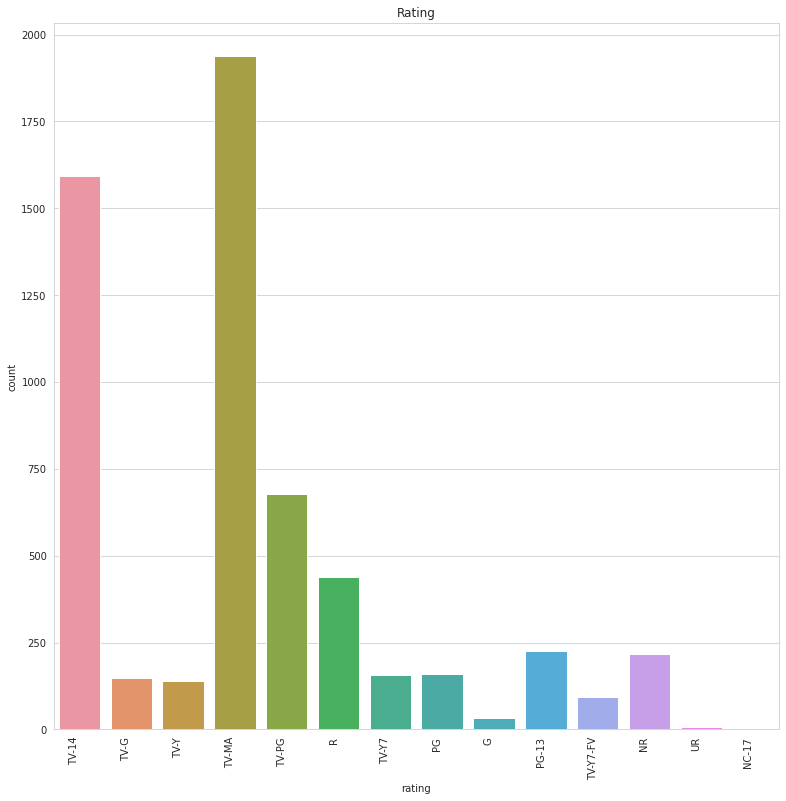

In [32]:
sns.countplot(netflix['rating'])
sns.countplot(netflix['rating']).set_xticklabels(sns.countplot(netflix['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Rating')

In [50]:

col = 'month_added'
vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color=['black', 'red', 'green', 'blue', 'cyan','black', 'red', 'green', 'blue', 'cyan']))
data = [trace1]
layout = go.Layout(title="In which month, the conent is added the most?", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

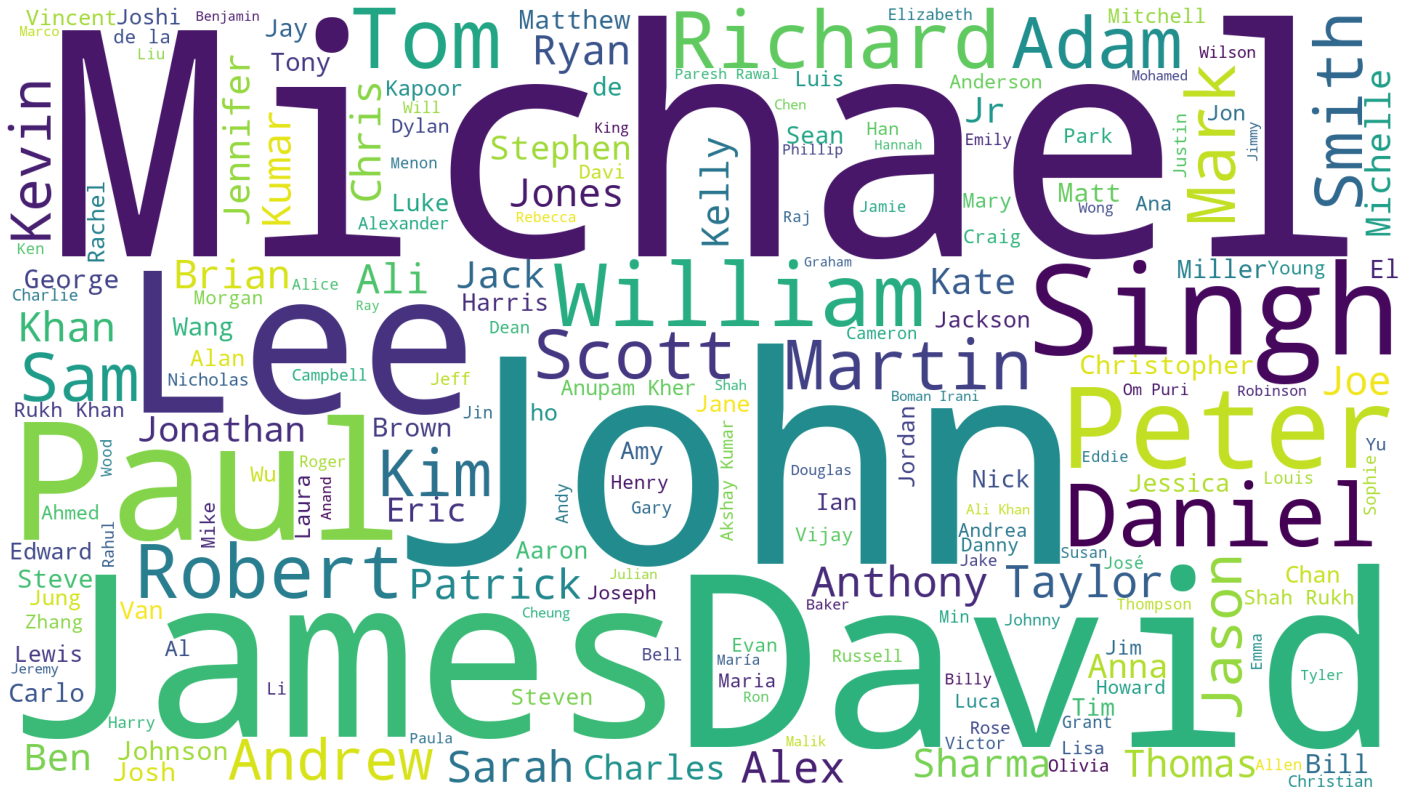

In [40]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='white',width=1920, height=1080).generate(" ".join(netflix_record.cast))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

Text(0.5, 1.0, 'Top 20 countries in terms of maximum number of movies on netflix')

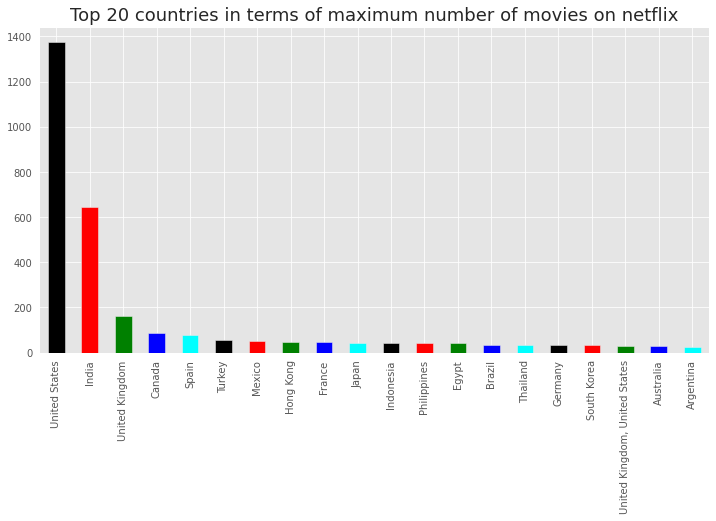

In [48]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
netflix[netflix["type"]=="Movie"]["country"].value_counts()[:20].plot(kind="bar",color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title("Top 20 countries in terms of maximum number of movies on netflix",size=18)

In [51]:
import plotly.figure_factory as ff
x1 = d2['duration'].fillna(0.0).astype(float)
fig = ff.create_distplot([x1], ['a'], bin_size=0.7, curve_type='normal', colors=["#6ad49b"])
fig.update_layout(title_text='Distplot with Normal Distribution')
fig.show()

In [70]:
#STATISTICS FOR VIDEOS WATCHED IN CANADA
youtube.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [73]:
#REMOVING DATA OF MISSING VALUE IN DATASET FOR USA
youtube.dropna(axis=0, how='any')

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
10,9wRQljFNDW8,17.14.11,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13T02:05:26.000Z,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...
36,Om_zGhJLZ5U,17.14.11,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,2017-11-12T18:00:03.000Z,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...
41,goP4Z5wyOlM,17.14.11,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,2017-11-12T21:16:40.000Z,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...
44,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...
46,ogYum4kWXgk,17.14.11,People are Awesome & The Pet Collective presen...,People are Awesome,24,2017-11-13T13:00:06.000Z,"people are awesome|""people are awesome 2017""|""...",69844,3417,33,160,https://i.ytimg.com/vi/ogYum4kWXgk/default.jpg,False,False,False,Pets are Awesome! This is for all the animal l...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40760,dS5Thrl-4Kc,18.14.06,CRAYOLA MAKEUP | HIT OR MISS?,Laura Lee,26,2018-06-12T18:55:26.000Z,"Laura88Lee|""crayola""|""crayon makeup""|""crayola ...",607422,26166,895,3517,https://i.ytimg.com/vi/dS5Thrl-4Kc/default.jpg,False,False,False,"Hey Larlees, todays video is me testing Crayol..."
40761,JGm9Y_hFqNk,18.14.06,First Take reacts: Kyrie Irving says contract ...,ESPN,17,2018-06-13T15:06:08.000Z,"espn|""espn live""|""boston celtics""|""kyrie irvin...",812832,7701,320,2505,https://i.ytimg.com/vi/JGm9Y_hFqNk/default.jpg,False,False,False,First Take's Stephen A. Smith and Max Kellerma...
40762,6h8QgZF5Qu4,18.14.06,Drop the Mic w/ Ashton Kutcher & Sean Diddy Combs,The Late Late Show with James Corden,24,2018-06-13T05:27:27.000Z,"The Late Late Show|""Late Late Show""|""James Cor...",864189,18811,399,1074,https://i.ytimg.com/vi/6h8QgZF5Qu4/default.jpg,False,False,False,James Corden and Ashton Kutcher square off in ...
40764,mpnshdmtE2Y,18.14.06,Carla Makes BA Smashburgers | From the Test Ki...,Bon Appétit,26,2018-06-12T16:03:58.000Z,"bon appetit|""burgers""|""cheeseburgers""|""how to ...",540149,14206,693,1211,https://i.ytimg.com/vi/mpnshdmtE2Y/default.jpg,False,False,False,"Ground chuck is a great all-purpose, buy-it-an..."


In [74]:
#FILTER USING COMMENT COUNT - HIGHEST TO LOWEST
youtube.sort_values(by='comment_count', ascending=False).head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
7169,Nk5yOFCsNeE,17.19.12,$360 KYLIE COSMETICS BRUSHES TESTED! HONEST AF...,Manny Mua,26,2017-12-12T20:59:48.000Z,"kylie cosmetics|""kylie jenner""|""kylie brushes""...",3096627,143831,3274,104113,https://i.ytimg.com/vi/Nk5yOFCsNeE/default.jpg,False,False,False,"HEY GUYS! Who’s ready for a BRUTALLY HONEST, H..."
18769,RQZr2NgKPiU,18.17.02,"Яхты, олигархи, девочки: охотница на мужчин ра...",Алексей Навальный,29,2018-02-08T09:40:57.000Z,"Навальный|""Навальный2018""|""Фонд борьбы с корру...",5579079,365439,63579,77462,https://i.ytimg.com/vi/RQZr2NgKPiU/default.jpg,False,False,False,Самое странное и скандальное расследование ФБК...
149,9wg3v-01yKQ,17.14.11,Harry Styles - Kiwi,HarryStylesVEVO,10,2017-11-08T13:00:01.000Z,"Columbia|""Harry Styles""|""Kiwi""|""Pop""",9632678,810895,16139,59473,https://i.ytimg.com/vi/9wg3v-01yKQ/default.jpg,False,False,False,Harry Styles' self-titled debut album is avail...
25357,IlkBLwl4aBM,18.23.03,Shawn Mendes In My Blood (Audio),Shawn Mendes,10,2018-03-22T04:15:44.000Z,"Shawn Mendes|""Stitches""|""in my blood""|""treat y...",4321512,598021,2990,54873,https://i.ytimg.com/vi/IlkBLwl4aBM/default.jpg,False,False,False,Get the new single In My Blood now: https://Is...
36950,jE2VvGZktJo,18.26.05,Jake Paul - Randy Savage (FT. Team 10 + Jitt &...,Jake Paul,22,2018-05-24T23:17:52.000Z,"Jake|""Paul""|""logan""|""paul""|""its""|""every""|""day""...",2974188,126093,83954,43019,https://i.ytimg.com/vi/jE2VvGZktJo/default.jpg,False,False,False,DOWNLOAD THIS SONG ON ITUNES NOW!! http://bit....


In [76]:
#FILTER USING COMMENT COUNT - LOWEST TO HIGHEST
youtube.sort_values(by='comment_count', ascending=True).head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
192,wRGldR_SQAA,17.14.11,Apple Clips sample,Steve Kovach,22,2017-11-09T18:01:04.000Z,[none],2259,0,0,0,https://i.ytimg.com/vi/wRGldR_SQAA/default.jpg,False,False,False,Clips 2.0 lets you use augmented reality and s...
6587,OmM425PFd3Y,17.16.12,How Noah Galvin Makes Evan Hansen His Own,BUILD Series,24,2017-12-12T22:51:37.000Z,"AOL Advertising|""BUILDseriesNYC""|""AOL Inc""|""AO...",1402,20,0,0,https://i.ytimg.com/vi/OmM425PFd3Y/default.jpg,False,False,False,"Noah Galvin, currently starring as the title r..."
18986,v4DFeT9z7yY,18.19.02,Camilla Cabello Performs 'Never Be the Same' |...,Dancing On Ice,24,2018-02-18T19:57:11.000Z,"dancing on ice|""ice skating""",59606,0,0,0,https://i.ytimg.com/vi/v4DFeT9z7yY/default.jpg,True,True,False,Camilla Cabello lights up the ice with an amaz...
11182,bT9HPXKP5dI,18.08.01,Road Rage - Russian Style,CHauserable,23,2017-12-22T15:37:49.000Z,[none],1807,6,3,0,https://i.ytimg.com/vi/bT9HPXKP5dI/default.jpg,False,False,False,NaN
160,qg0GdM60syI,17.14.11,Huffy Metaloid Bicycle Commercial 1997,90s Commercials,27,2017-03-31T21:46:53.000Z,"90s commercials|""Huffy""",773,2,0,0,https://i.ytimg.com/vi/qg0GdM60syI/default.jpg,False,False,False,Anyone have one of those?


In [79]:
#SORTING FOR MOST DISLIKED VIDEOS WITH MOST VIEWS
youtube.sort_values(by=['dislikes','views'], 
        ascending=[False, False]).head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
36950,jE2VvGZktJo,18.26.05,Jake Paul - Randy Savage (FT. Team 10 + Jitt &...,Jake Paul,22,2018-05-24T23:17:52.000Z,"Jake|""Paul""|""logan""|""paul""|""its""|""every""|""day""...",2974188,126093,83954,43019,https://i.ytimg.com/vi/jE2VvGZktJo/default.jpg,False,False,False,DOWNLOAD THIS SONG ON ITUNES NOW!! http://bit....
18769,RQZr2NgKPiU,18.17.02,"Яхты, олигархи, девочки: охотница на мужчин ра...",Алексей Навальный,29,2018-02-08T09:40:57.000Z,"Навальный|""Навальный2018""|""Фонд борьбы с корру...",5579079,365439,63579,77462,https://i.ytimg.com/vi/RQZr2NgKPiU/default.jpg,False,False,False,Самое странное и скандальное расследование ФБК...
19173,CMA2iF6RuXk,18.20.02,Fergie's national anthem draws criticism | ESPN,ESPN,17,2018-02-19T12:42:36.000Z,"espn|""espn live""|""fergie""|""national""|""anthem""|...",2762839,14362,37877,21507,https://i.ytimg.com/vi/CMA2iF6RuXk/default.jpg,False,False,False,The Black Eyed Peas singer Fergie provides a u...
32353,2z870cifG_A,18.03.05,YouTube Sent Me The Wrong Play Button (10 Mill...,RiceGum,24,2018-05-01T21:05:19.000Z,"jake paul|""logan paul""|""youtube""|""play button""...",2016536,109686,21229,12214,https://i.ytimg.com/vi/2z870cifG_A/default.jpg,False,False,False,NEW VIDEO TOMORROW 100%Get My New Merch Here 👉...
149,9wg3v-01yKQ,17.14.11,Harry Styles - Kiwi,HarryStylesVEVO,10,2017-11-08T13:00:01.000Z,"Columbia|""Harry Styles""|""Kiwi""|""Pop""",9632678,810895,16139,59473,https://i.ytimg.com/vi/9wg3v-01yKQ/default.jpg,False,False,False,Harry Styles' self-titled debut album is avail...
1757,pi0ePRY7TSc,17.22.11,Terry Crews Says He Was Sexually Assaulted,Wendy Williams,24,2017-11-16T02:00:03.000Z,"terry crews|""good morning america""|""mariah car...",451381,3110,14575,3095,https://i.ytimg.com/vi/pi0ePRY7TSc/default.jpg,False,False,False,Actor Terry Crews spoke out on Good Morning Am...
11207,vU7v5A5P8BM,18.09.01,Tapper cuts off Trump adviser interview: I've ...,CNN,25,2018-01-07T15:34:15.000Z,"latest News|""Happening Now""|""CNN""|""state of th...",2592824,28132,11319,35908,https://i.ytimg.com/vi/vU7v5A5P8BM/default.jpg,False,False,False,CNN's Jake Tapper abruptly ends his interview ...
40340,MAjY8mCTXWk,18.11.06,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...",杰威爾音樂 JVR Music,10,2018-05-14T15:59:47.000Z,"周杰倫|""Jay""|""Chou""|""周董""|""周杰伦""|""周傑倫""|""杰威尔""|""周周""|""...",21957640,140214,10716,15418,https://i.ytimg.com/vi/MAjY8mCTXWk/default.jpg,False,False,False,MV點閱率破華語歌曲紀錄，首日點閱突破200萬，三週已狂飆2000萬！不僅在華語地區蟬聯發燒...
21972,tCnbAAgfxH8,18.06.03,Jimmy Kimmel's Oscars Monologue 2018,Jimmy Kimmel Live,24,2018-03-05T01:47:21.000Z,"oscars|""academy""|""awards""|""opening""|""monologue...",3687110,44409,9024,6365,https://i.ytimg.com/vi/tCnbAAgfxH8/default.jpg,False,False,False,Jimmy's opening monologue from the 90th Academ...
15397,Tz5L-rNWZBs,18.01.02,Stephen Goes Live After Trump's State Of The U...,The Late Show with Stephen Colbert,24,2018-01-31T06:43:04.000Z,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",2390395,30286,9016,10766,https://i.ytimg.com/vi/Tz5L-rNWZBs/default.jpg,False,False,False,"An hour after Trump's State of the Union, Step..."


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

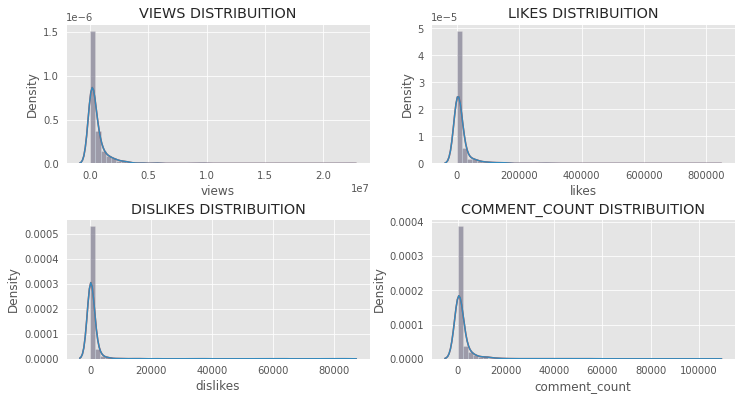

In [81]:
num_attributes = youtube.select_dtypes(include='int64').drop('category_id', axis=1).copy()

fig = plt.figure(figsize=(12,6))
for i in range(len(num_attributes.columns)):
    fig.add_subplot(2,2,i+1)
    sns.distplot(num_attributes.iloc[:,i].dropna())
    sns.distplot(num_attributes.iloc[:,i].dropna()).set_title(num_attributes.columns[i].upper() + " DISTRIBUITION")
    plt.xlabel(num_attributes.columns[i])
    plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
    
plt.show()

In [84]:
#ADDING CATEGORIES TO VIDEOS IN USA
conditions = [
    (youtube['category_id'] == 1), (youtube['category_id'] == 2), 
    (youtube['category_id'] == 10), (youtube['category_id'] == 15),
    (youtube['category_id'] == 17), (youtube['category_id'] == 18), 
    (youtube['category_id'] == 19), (youtube['category_id'] == 20),
    (youtube['category_id'] == 21), (youtube['category_id'] == 22),
    (youtube['category_id'] == 23), (youtube['category_id'] == 24),
    (youtube['category_id'] == 25), (youtube['category_id'] == 26),
    (youtube['category_id'] == 27), (youtube['category_id'] == 28),
    (youtube['category_id'] == 29), (youtube['category_id'] == 30),
    (youtube['category_id'] == 31), (youtube['category_id'] == 32),
    (youtube['category_id'] == 33), (youtube['category_id'] == 34),
    (youtube['category_id'] == 35), (youtube['category_id'] == 36),
    (youtube['category_id'] == 37), (youtube['category_id'] == 38),
    (youtube['category_id'] == 39), (youtube['category_id'] == 40),
    (youtube['category_id'] == 41), (youtube['category_id'] == 42),
    (youtube['category_id'] == 43), (youtube['category_id'] == 44),
    ]

values = ['Film and Animation', 'Autos and Vehicles', 'Music',
               'Pets and Animals', 'Sports', 'Short Movies',
               'Travel and Events', 'Gaming', 'Videoblogging',
               'People and Blogs', 'Comedy', 'Entertainment',
               'News and Politics', 'How to and Style', 'Education',
               'Science and Technology', 'Nonprofits & Activism', 'Movies',
               'Anime/Animation', 'Action/Adventure', 'Classics', 'Comedy',
               'Documentary', 'Drama', 'Family', 'Foreign', 'Horror',
               'Sci-Fi/Fantasy', 'Thriller', 'Shorts', 'Shows', 'Trailers']
youtube['category_title'] = np.select(conditions, values)
youtube.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title
10,9wRQljFNDW8,17.14.11,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13T02:05:26.000Z,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...,Sports
36,Om_zGhJLZ5U,17.14.11,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,2017-11-12T18:00:03.000Z,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...,Film and Animation
41,goP4Z5wyOlM,17.14.11,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,2017-11-12T21:16:40.000Z,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...,News and Politics
44,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People and Blogs
46,ogYum4kWXgk,17.14.11,People are Awesome & The Pet Collective presen...,People are Awesome,24,2017-11-13T13:00:06.000Z,"people are awesome|""people are awesome 2017""|""...",69844,3417,33,160,https://i.ytimg.com/vi/ogYum4kWXgk/default.jpg,False,False,False,Pets are Awesome! This is for all the animal l...,Entertainment


Top 5 Category ID count
Entertainment        255
Sports                93
News and Politics     86
Comedy                80
Music                 48
Name: category_title, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



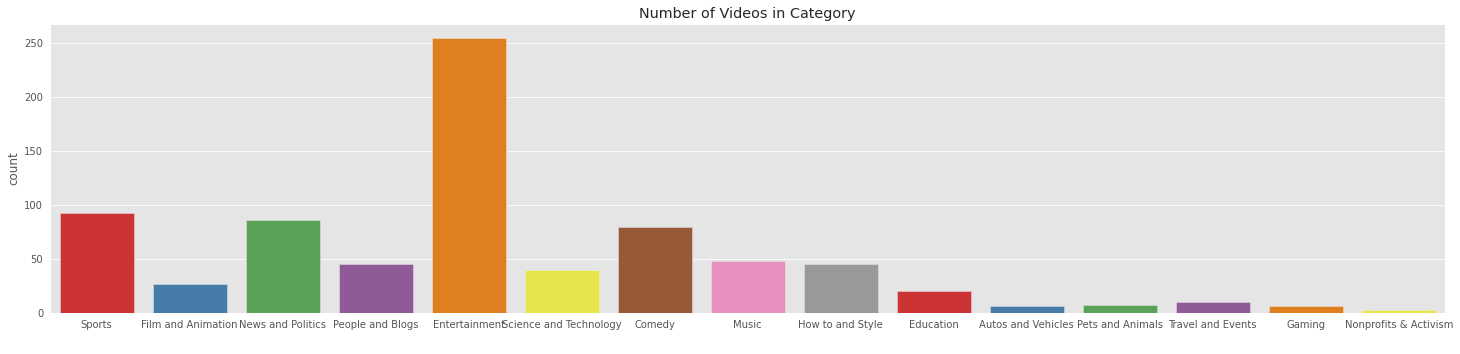

In [88]:
print("Top 5 Category ID count")
print(youtube.category_title.value_counts()[:5])

fig = plt.figure(figsize=(25,15))
fig.add_subplot(2,1,1)
sns.countplot('category_title', data=youtube, palette="Set1")
sns.countplot('category_title', data=youtube, palette="Set1").set_title("Number of Videos in Category")
plt.xlabel(" ")
plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

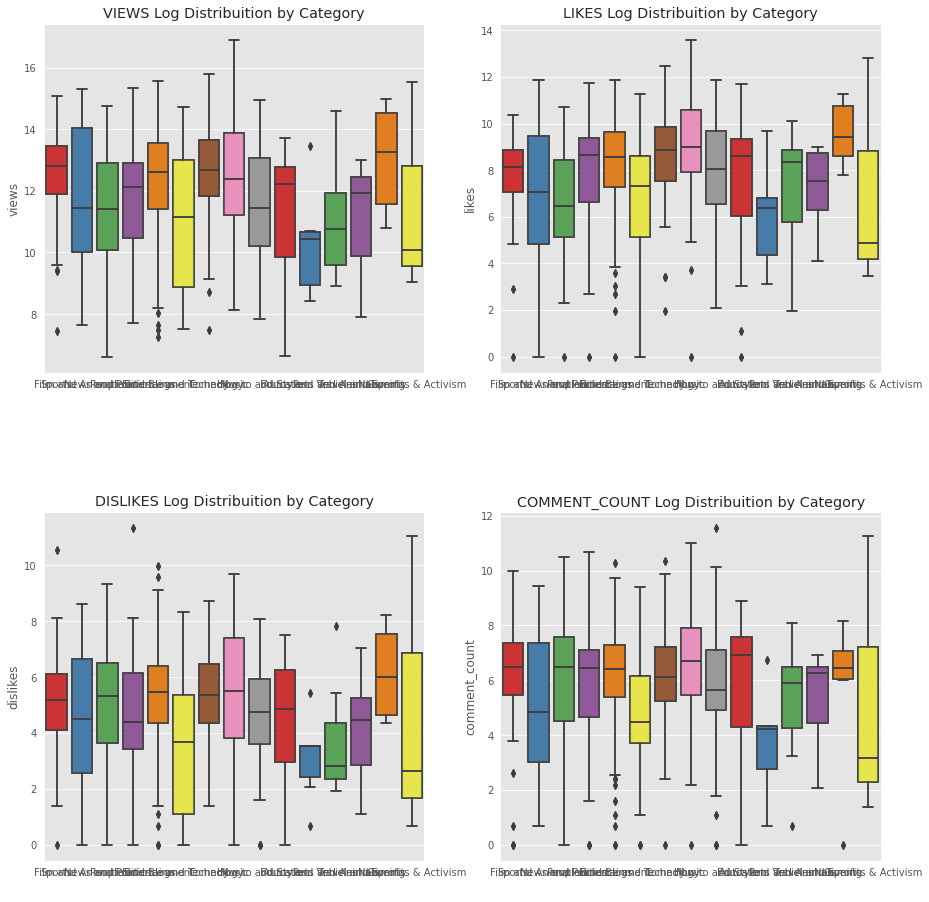

In [94]:
fig = plt.figure(figsize=(15,15))
log_num_attributes = np.log(num_attributes + 1)
for i in range(len(log_num_attributes.columns)):
    fig.add_subplot(2,2,i+1)
    sns.boxplot(x='category_title', y=log_num_attributes.iloc[:,i], data=youtube, palette="Set1")
    sns.boxplot(x='category_title', y=log_num_attributes.iloc[:,i], data=youtube, palette="Set1").set_title(log_num_attributes.columns[i].upper() + " Log Distribuition by Category")
    plt.xlabel(" ")
    plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
plt.show()

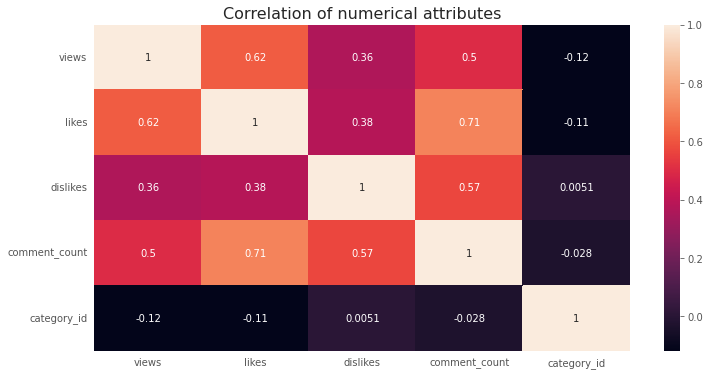

In [95]:
correlation = youtube[['views', 'likes', 'dislikes', 'comment_count', 'category_id']].corr()
f, ax = plt.subplots(figsize=(12,6))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlation, annot=True)
plt.show()

Text(0.5, 1.0, 'Top 20 countries in terms of maximum number of movies on netflix')

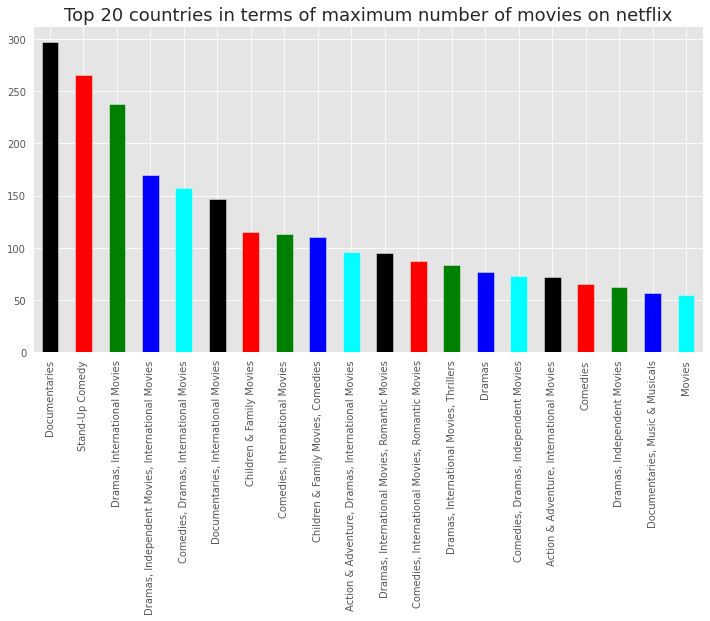

In [105]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
netflix[netflix["type"]=="Movie"]["listed_in"].value_counts()[:20].plot(kind="bar",color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title("Top 20 countries in terms of maximum number of movies on netflix",size=18)